# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
print(df_tesla.shape)
print(df_tesla.columns)
print(df_tesla.head())

(124, 3)
Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368


In [4]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [5]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [6]:
print(df_unemployment.shape)
print(df_unemployment.head())
print(df_unemployment.describe())

(181, 3)
     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
3  2004-04                      29     5.6
4  2004-05                      23     5.6
       UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
std                 20.484925    1.891859
min                 14.000000    3.700000
25%                 21.000000    4.700000
50%                 26.000000    5.400000
75%                 45.000000    7.800000
max                100.000000   10.000000


In [7]:
print('Largest value for "Unemployment Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()} = {df_unemployment["UNRATE"].loc[df_unemployment["UE_BENEFITS_WEB_SEARCH"].idxmax()]}')

Largest value for "Unemployment Benefits" in Web Search: 100 = 8.3


### Bitcoin

In [8]:
print(df_btc_search.shape)
print(df_btc_search)
print(df_btc_search.describe())

(73, 2)
      MONTH  BTC_NEWS_SEARCH
0   2014-09                5
1   2014-10                4
2   2014-11                4
3   2014-12                4
4   2015-01                5
..      ...              ...
68  2020-05               22
69  2020-06               13
70  2020-07               14
71  2020-08               16
72  2020-09               13

[73 rows x 2 columns]
       BTC_NEWS_SEARCH
count        73.000000
mean         15.013699
std          15.146959
min           3.000000
25%           5.000000
50%          14.000000
75%          18.000000
max         100.000000


In [9]:
print(df_btc_price.shape)
print(df_btc_price)
print(df_btc_price.describe())

(2204, 3)
            DATE         CLOSE        VOLUME
0     2014-09-17    457.334015  2.105680e+07
1     2014-09-18    424.440002  3.448320e+07
2     2014-09-19    394.795990  3.791970e+07
3     2014-09-20    408.903992  3.686360e+07
4     2014-09-21    398.821014  2.658010e+07
...          ...           ...           ...
2199  2020-09-24  10745.548828  2.301754e+10
2200  2020-09-25  10702.290039  2.123255e+10
2201  2020-09-26  10754.437500  1.810501e+10
2202  2020-09-27  10774.426758  1.801688e+10
2203  2020-09-28  10912.536133  2.122653e+10

[2204 rows x 3 columns]
              CLOSE        VOLUME
count   2203.000000  2.203000e+03
mean    4429.421245  8.043622e+09
std     4148.150071  1.176529e+10
min      178.102997  5.914570e+06
25%      433.629502  6.029915e+07
50%     3637.520020  2.018890e+09
75%     7997.372803  1.322478e+10
max    19497.400391  7.415677e+10


In [10]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()} at {df_btc_search.MONTH.loc[df_btc_search.BTC_NEWS_SEARCH.idxmax()]}')

largest BTC News Search: 100 at 2017-12


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [11]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [12]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [13]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
df_nan_indices = [index for index, row in df_btc_price.iterrows() if row.isna().any()]
rows_with_nan = [index for index, row in df_btc_price.iterrows() if row.isnull().any()]
print(df_nan_indices)
print(rows_with_nan)

for i in range(len(df_nan_indices)):
  print(df_btc_price.loc[df_nan_indices[i]])

print(df_btc_price[df_btc_price.CLOSE.isna()])
print(df_btc_price[df_btc_price.VOLUME.isna()])

Number of missing values: 2
[2148]
[2148]
DATE      2020-08-04
CLOSE            NaN
VOLUME           NaN
Name: 2148, dtype: object
            DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN
            DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN


**Challenge**: Remove any missing values that you found. 

In [14]:
df_btc_price.dropna(inplace=True)
df_btc_price.shape

(2203, 3)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [15]:
print(type(df_tesla.MONTH[0]))
print(df_tesla.MONTH)

df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
print(df_tesla.MONTH)

print(df_tesla.MONTH.dtypes)
print(type(df_tesla.MONTH[0]))

<class 'str'>
0      2010-06-01
1      2010-07-01
2      2010-08-01
3      2010-09-01
4      2010-10-01
          ...    
119    2020-05-01
120    2020-06-01
121    2020-07-01
122    2020-08-01
123    2020-09-01
Name: MONTH, Length: 124, dtype: object
0     2010-06-01
1     2010-07-01
2     2010-08-01
3     2010-09-01
4     2010-10-01
         ...    
119   2020-05-01
120   2020-06-01
121   2020-07-01
122   2020-08-01
123   2020-09-01
Name: MONTH, Length: 124, dtype: datetime64[ns]
datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [16]:
print(df_unemployment)
print(type(df_unemployment.MONTH[0]))

df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

print(type(df_unemployment.MONTH[0]))
print(df_unemployment.MONTH.dtypes)
print(df_unemployment)

       MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0    2004-01                      34     5.7
1    2004-02                      33     5.6
2    2004-03                      25     5.8
3    2004-04                      29     5.6
4    2004-05                      23     5.6
..       ...                     ...     ...
176  2018-09                      14     3.7
177  2018-10                      15     3.8
178  2018-11                      16     3.7
179  2018-12                      17     3.9
180  2019-01                      21     4.0

[181 rows x 3 columns]
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
datetime64[ns]
         MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0   2004-01-01                      34     5.7
1   2004-02-01                      33     5.6
2   2004-03-01                      25     5.8
3   2004-04-01                      29     5.6
4   2004-05-01                      23     5.6
..         ...                     ...     ...
176 2018-09-01             

In [17]:
print(df_btc_search)
print(type(df_btc_search.MONTH[0]))

df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

print(df_btc_search)
print(type(df_btc_search.MONTH[0]))
print(df_btc_search.MONTH.dtypes)

print("----------------------------------------------")

print(df_btc_price)
print(type(df_btc_price.DATE[0]))

df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

print(df_btc_price)
print(type(df_btc_price.DATE[0]))
print(df_btc_price.DATE.dtypes)

      MONTH  BTC_NEWS_SEARCH
0   2014-09                5
1   2014-10                4
2   2014-11                4
3   2014-12                4
4   2015-01                5
..      ...              ...
68  2020-05               22
69  2020-06               13
70  2020-07               14
71  2020-08               16
72  2020-09               13

[73 rows x 2 columns]
<class 'str'>
        MONTH  BTC_NEWS_SEARCH
0  2014-09-01                5
1  2014-10-01                4
2  2014-11-01                4
3  2014-12-01                4
4  2015-01-01                5
..        ...              ...
68 2020-05-01               22
69 2020-06-01               13
70 2020-07-01               14
71 2020-08-01               16
72 2020-09-01               13

[73 rows x 2 columns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
datetime64[ns]
----------------------------------------------
            DATE         CLOSE        VOLUME
0     2014-09-17    457.334015  2.105680e+07
1     2014-09-18 

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [18]:
df_btc_price.DATE.describe(datetime_is_numeric=True)

count                             2203
mean     2017-09-22 00:35:57.058583040
min                2014-09-17 00:00:00
25%                2016-03-20 12:00:00
50%                2017-09-22 00:00:00
75%                2019-03-26 12:00:00
max                2020-09-28 00:00:00
Name: DATE, dtype: object

In [19]:
resampled_df_btc_price_mean = df_btc_price.resample("M", on="DATE").mean()
print(resampled_df_btc_price_mean)
resampled_df_btc_price_last = df_btc_price.resample("M", on="DATE").last()
print(resampled_df_btc_price_last)

                   CLOSE        VOLUME
DATE                                  
2014-09-30    407.182428  2.934864e+07
2014-10-31    364.148873  2.912885e+07
2014-11-30    366.099799  2.199111e+07
2014-12-31    341.267871  1.784201e+07
2015-01-31    248.782547  3.544555e+07
...                  ...           ...
2020-05-31   9263.151745  4.149575e+10
2020-06-30   9489.227214  2.169711e+10
2020-07-31   9589.899729  1.760688e+10
2020-08-31  11667.277572  2.290423e+10
2020-09-30  10655.702218  3.039781e+10

[73 rows x 2 columns]
                 DATE         CLOSE        VOLUME
DATE                                             
2014-09-30 2014-09-30    386.944000  3.470730e+07
2014-10-31 2014-10-31    338.321014  1.254540e+07
2014-11-30 2014-11-30    378.046997  9.194440e+06
2014-12-31 2014-12-31    320.192993  1.394290e+07
2015-01-31 2015-01-31    217.464005  2.334820e+07
...               ...           ...           ...
2020-05-31 2020-05-31   9461.058594  2.777329e+10
2020-06-30 2020-06-3

# Data Visualisation

### Notebook Formatting & Style Helpers

In [20]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_format = mdates.DateFormatter("%Y")

In [21]:
# Register date converters to avoid warning messages
print(df_tesla)

         MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0   2010-06-01                3        4.766000
1   2010-07-01                3        3.988000
2   2010-08-01                2        3.896000
3   2010-09-01                2        4.082000
4   2010-10-01                2        4.368000
..         ...              ...             ...
119 2020-05-01               16      167.000000
120 2020-06-01               17      215.962006
121 2020-07-01               24      286.152008
122 2020-08-01               23      498.320007
123 2020-09-01               31      407.339996

[124 rows x 3 columns]


### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

<function matplotlib.pyplot.show>

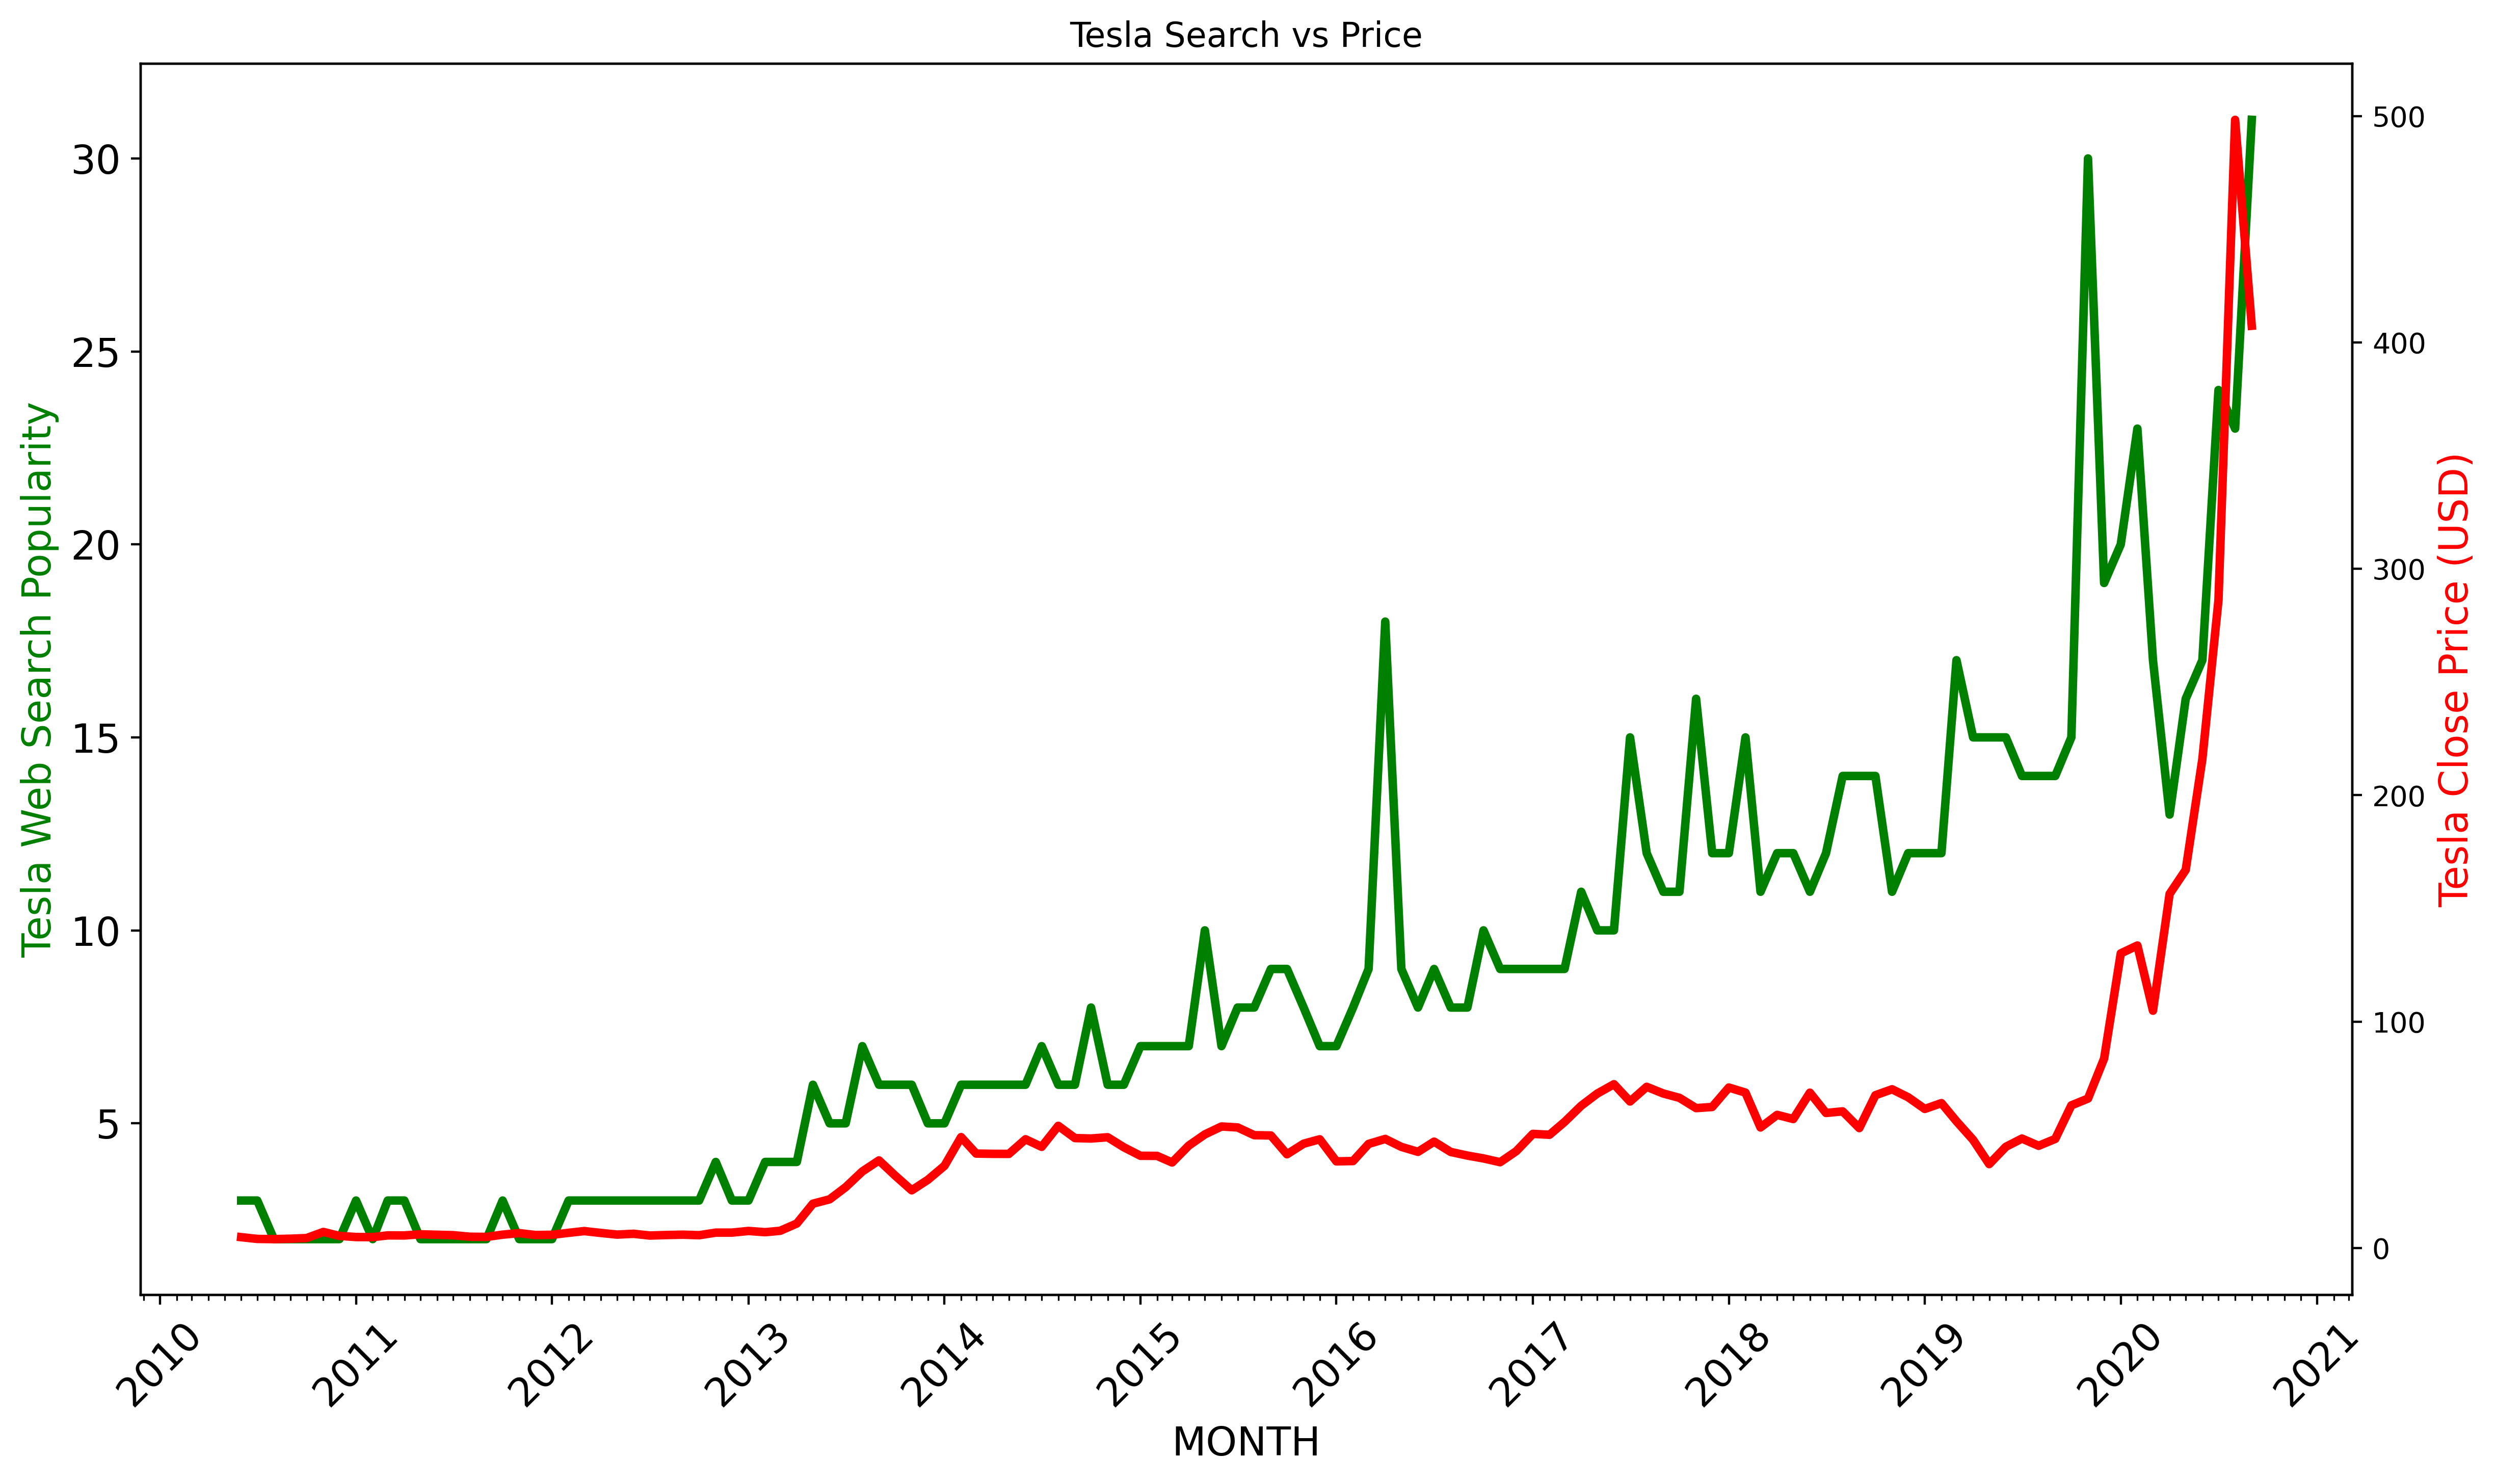

In [22]:
plt.figure(figsize=(14, 8), dpi=400)
plt.title("Tesla Search vs Price")

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_format = mdates.DateFormatter("%Y")

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="green", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="red", linewidth=3)

ax1.set_xlabel("MONTH", fontsize=14)
ax1.set_ylabel("Tesla Web Search Popularity", fontsize=14, color="green")
ax2.set_ylabel("Tesla Close Price (USD)", fontsize=14, color="red")

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

plt.show

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis. 

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

<function matplotlib.pyplot.show>

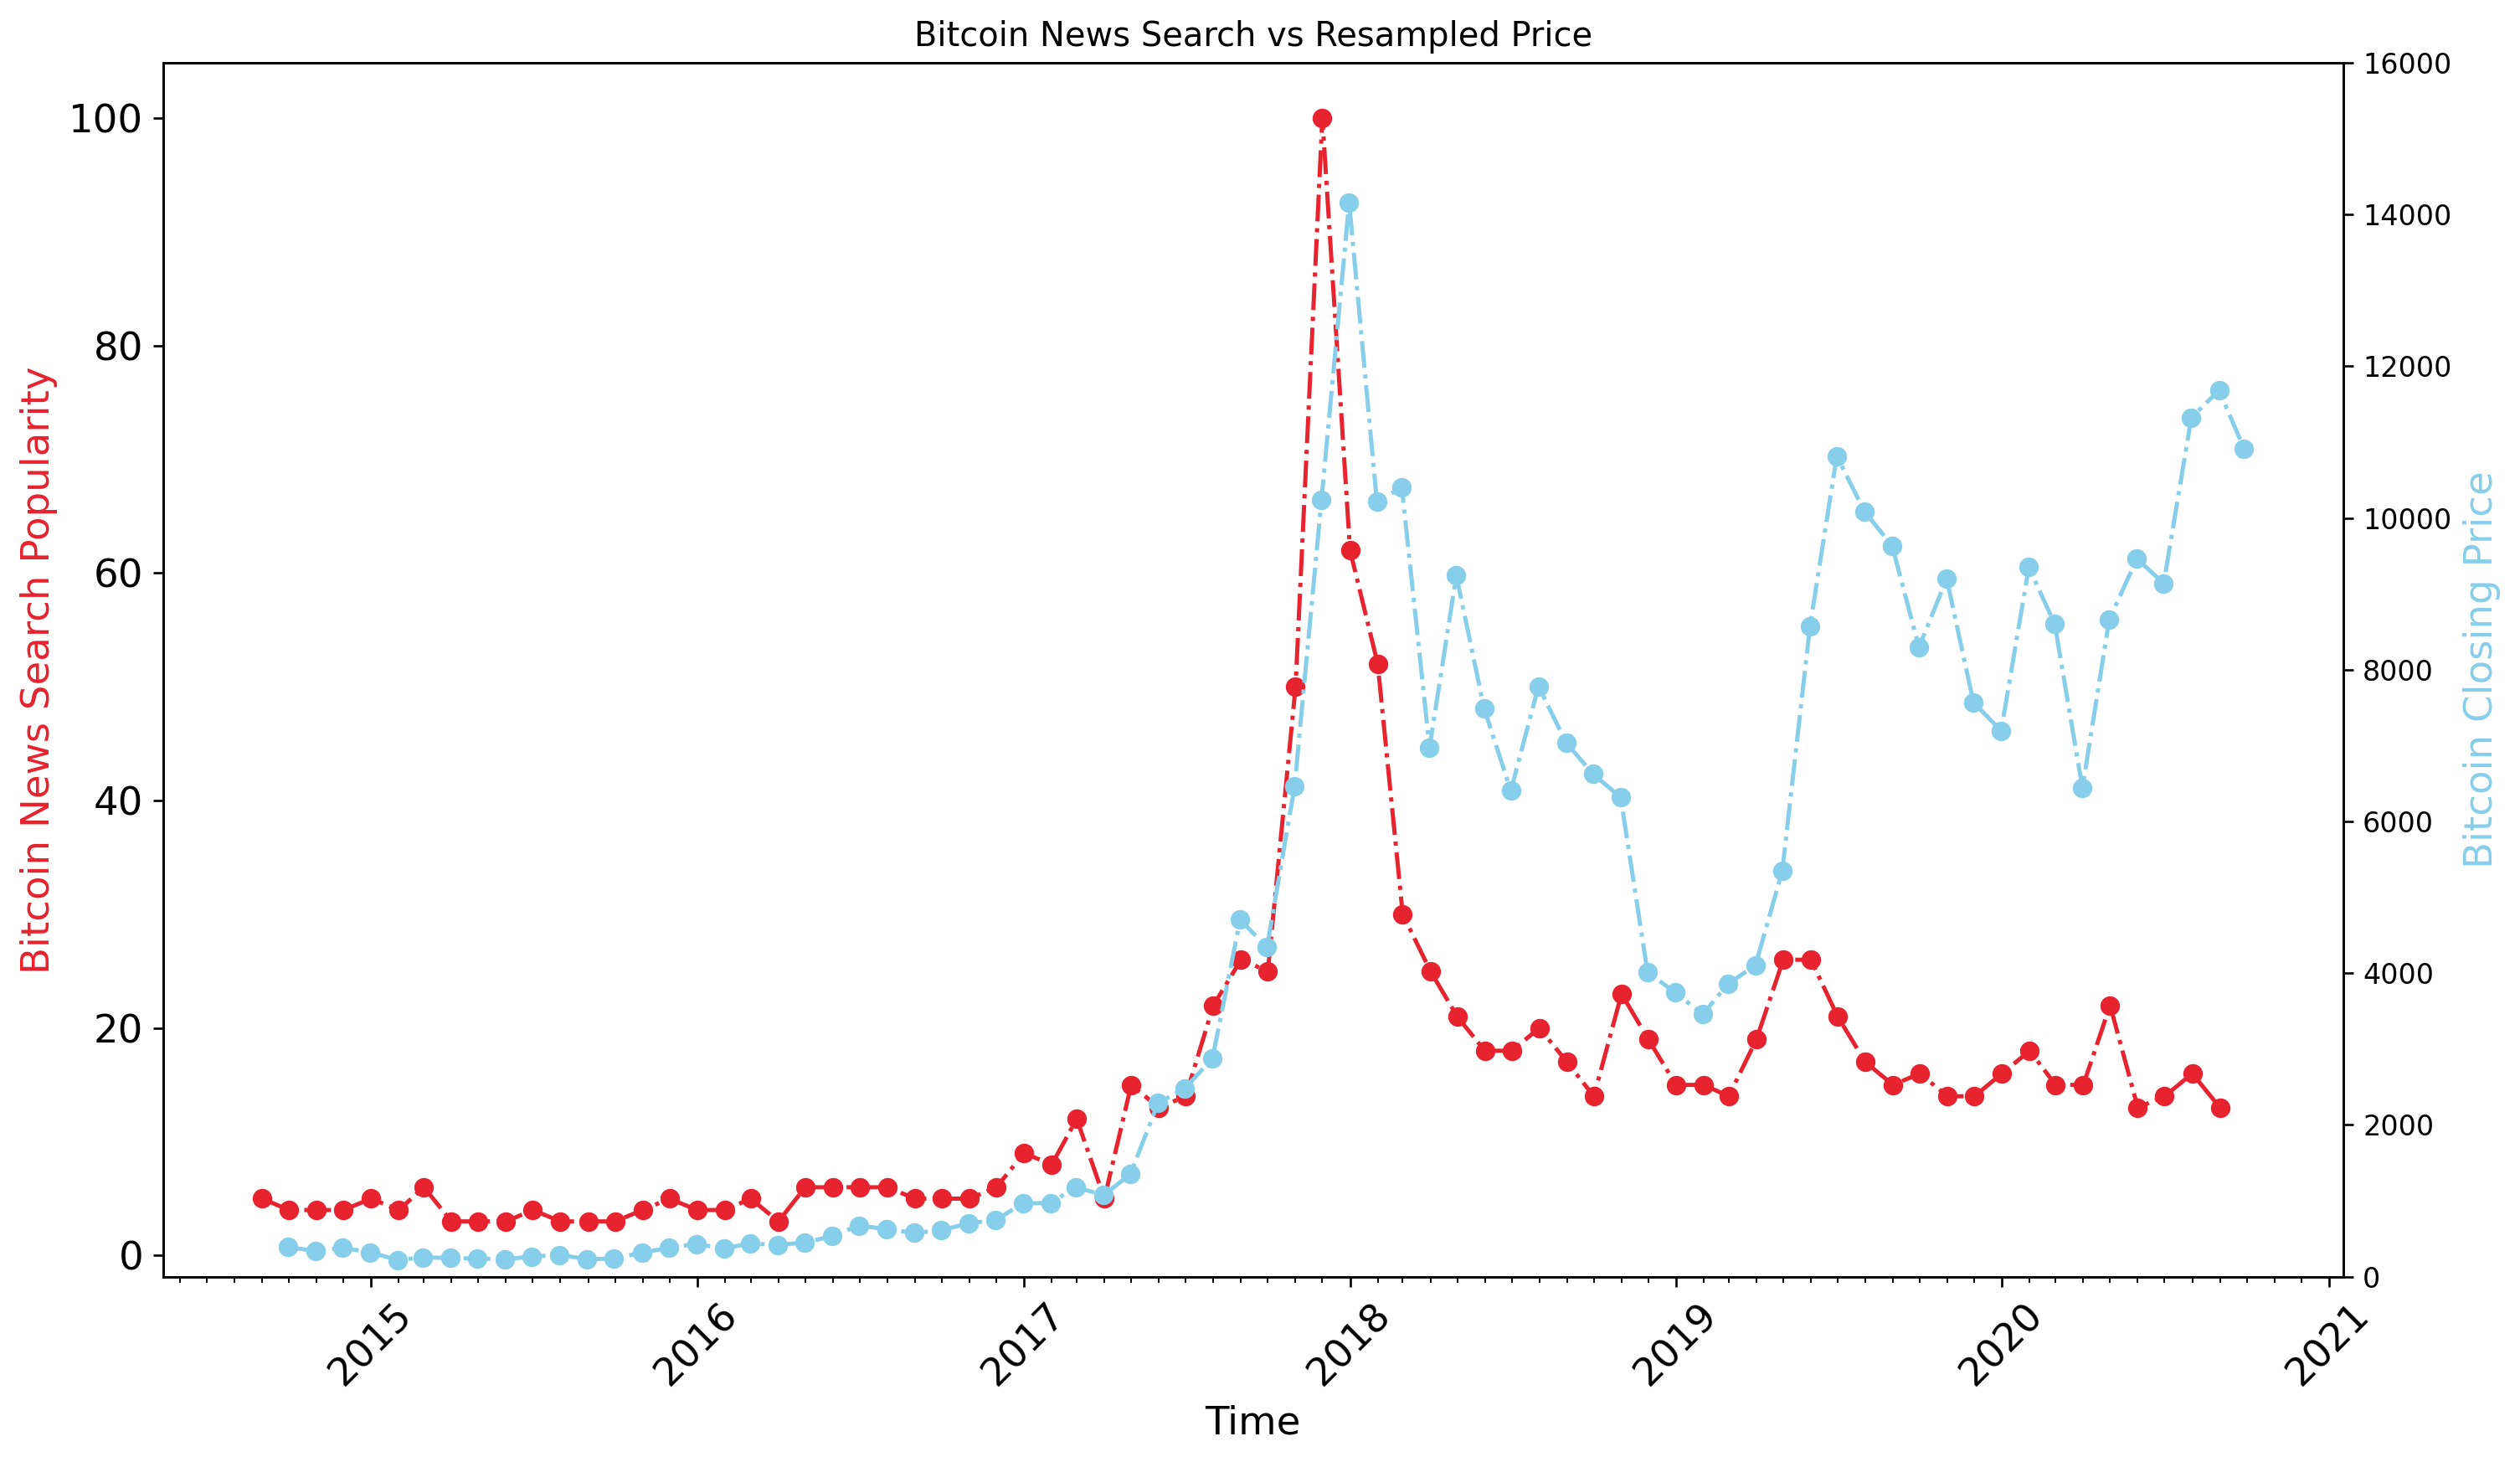

In [23]:
plt.figure(figsize=(14, 8), dpi=240)
plt.title("Bitcoin News Search vs Resampled Price")

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_format = mdates.DateFormatter("%Y")

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color="#E6232E", linestyle="-.", marker="o")
ax2.plot(resampled_df_btc_price_last.DATE, resampled_df_btc_price_last.CLOSE, color="skyblue", linestyle="-.", marker="o")

ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylabel("Bitcoin News Search Popularity", fontsize=14, color="#E6232E")
ax2.set_ylabel("Bitcoin Closing Price", fontsize=14, color="skyblue")

ax2.set_ylim(0, 16000)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

plt.show

<function matplotlib.pyplot.show>

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

<function matplotlib.pyplot.show>

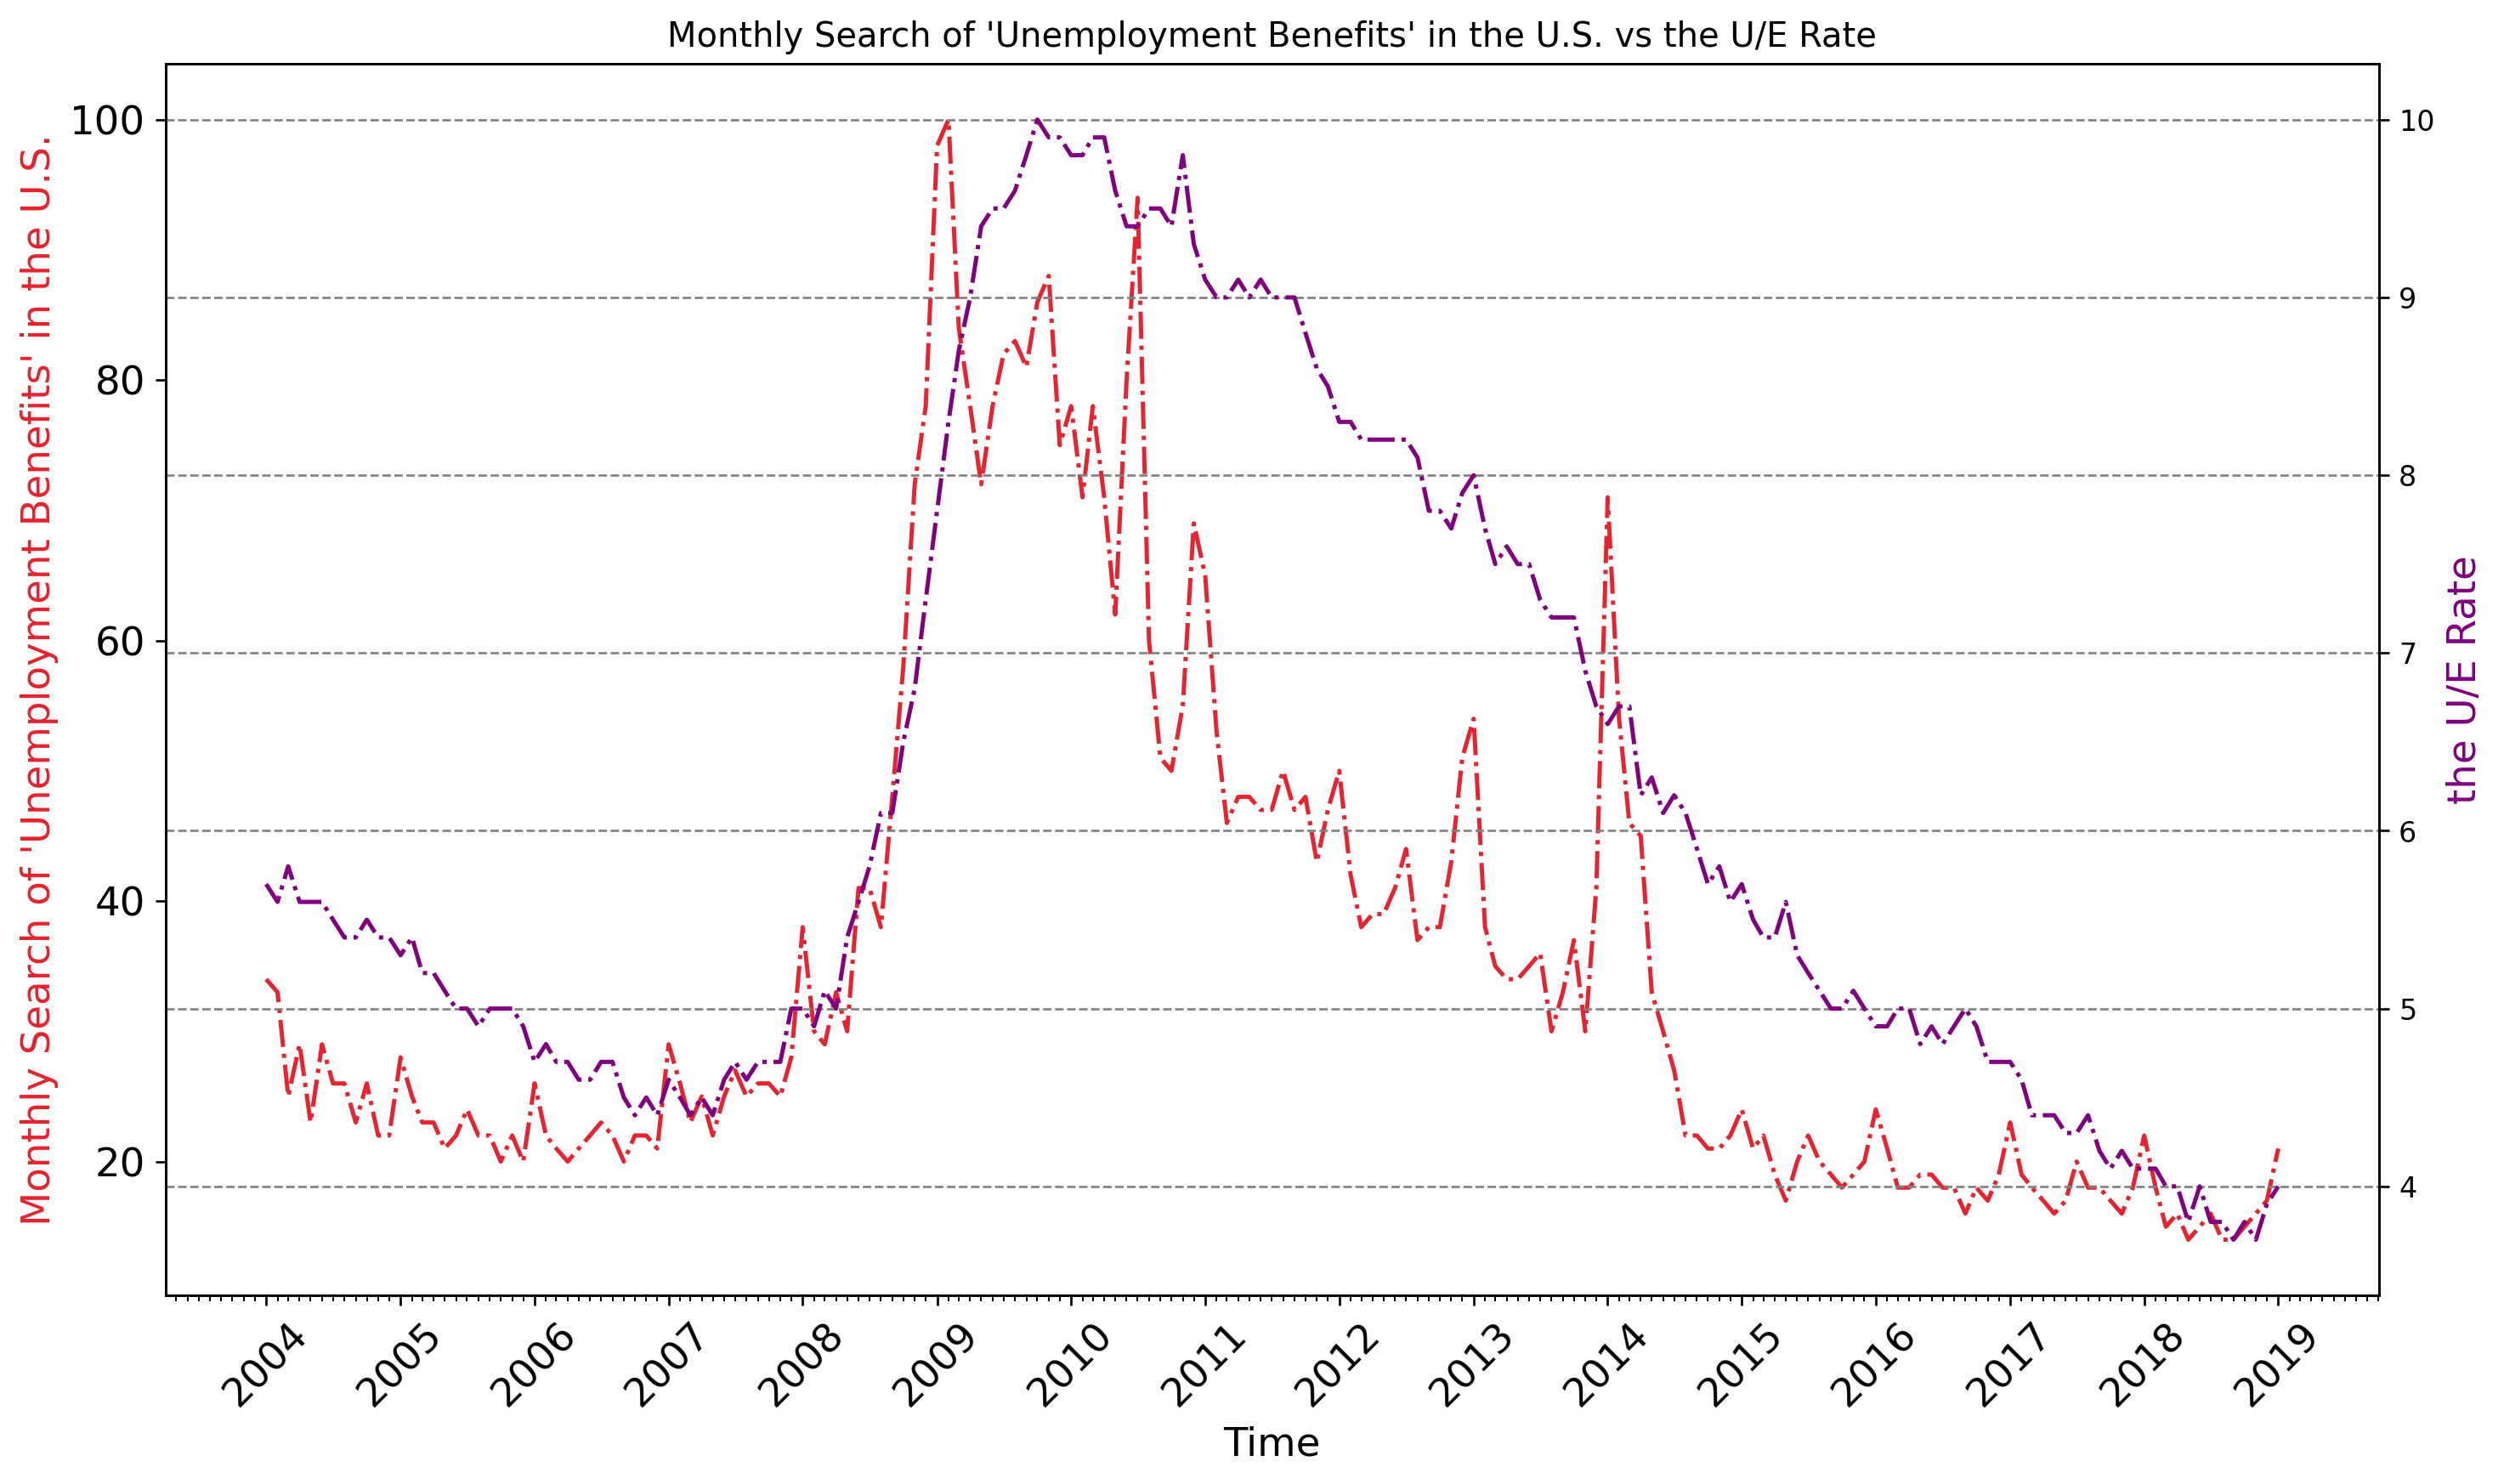

In [24]:
plt.figure(figsize=(14, 8), dpi=240)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate")

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_format = mdates.DateFormatter("%Y")

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color="#E6232E", linestyle="-.")
ax2.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color="purple", linestyle="-.")

ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylabel("Monthly Search of 'Unemployment Benefits' in the U.S.", fontsize=14, color="#E6232E")
ax2.set_ylabel("the U/E Rate", fontsize=14, color="purple")

# ax2.set_ylim(0, 16000)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

plt.grid(color="grey", linestyle="dashed")

plt.show

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


<function matplotlib.pyplot.show>

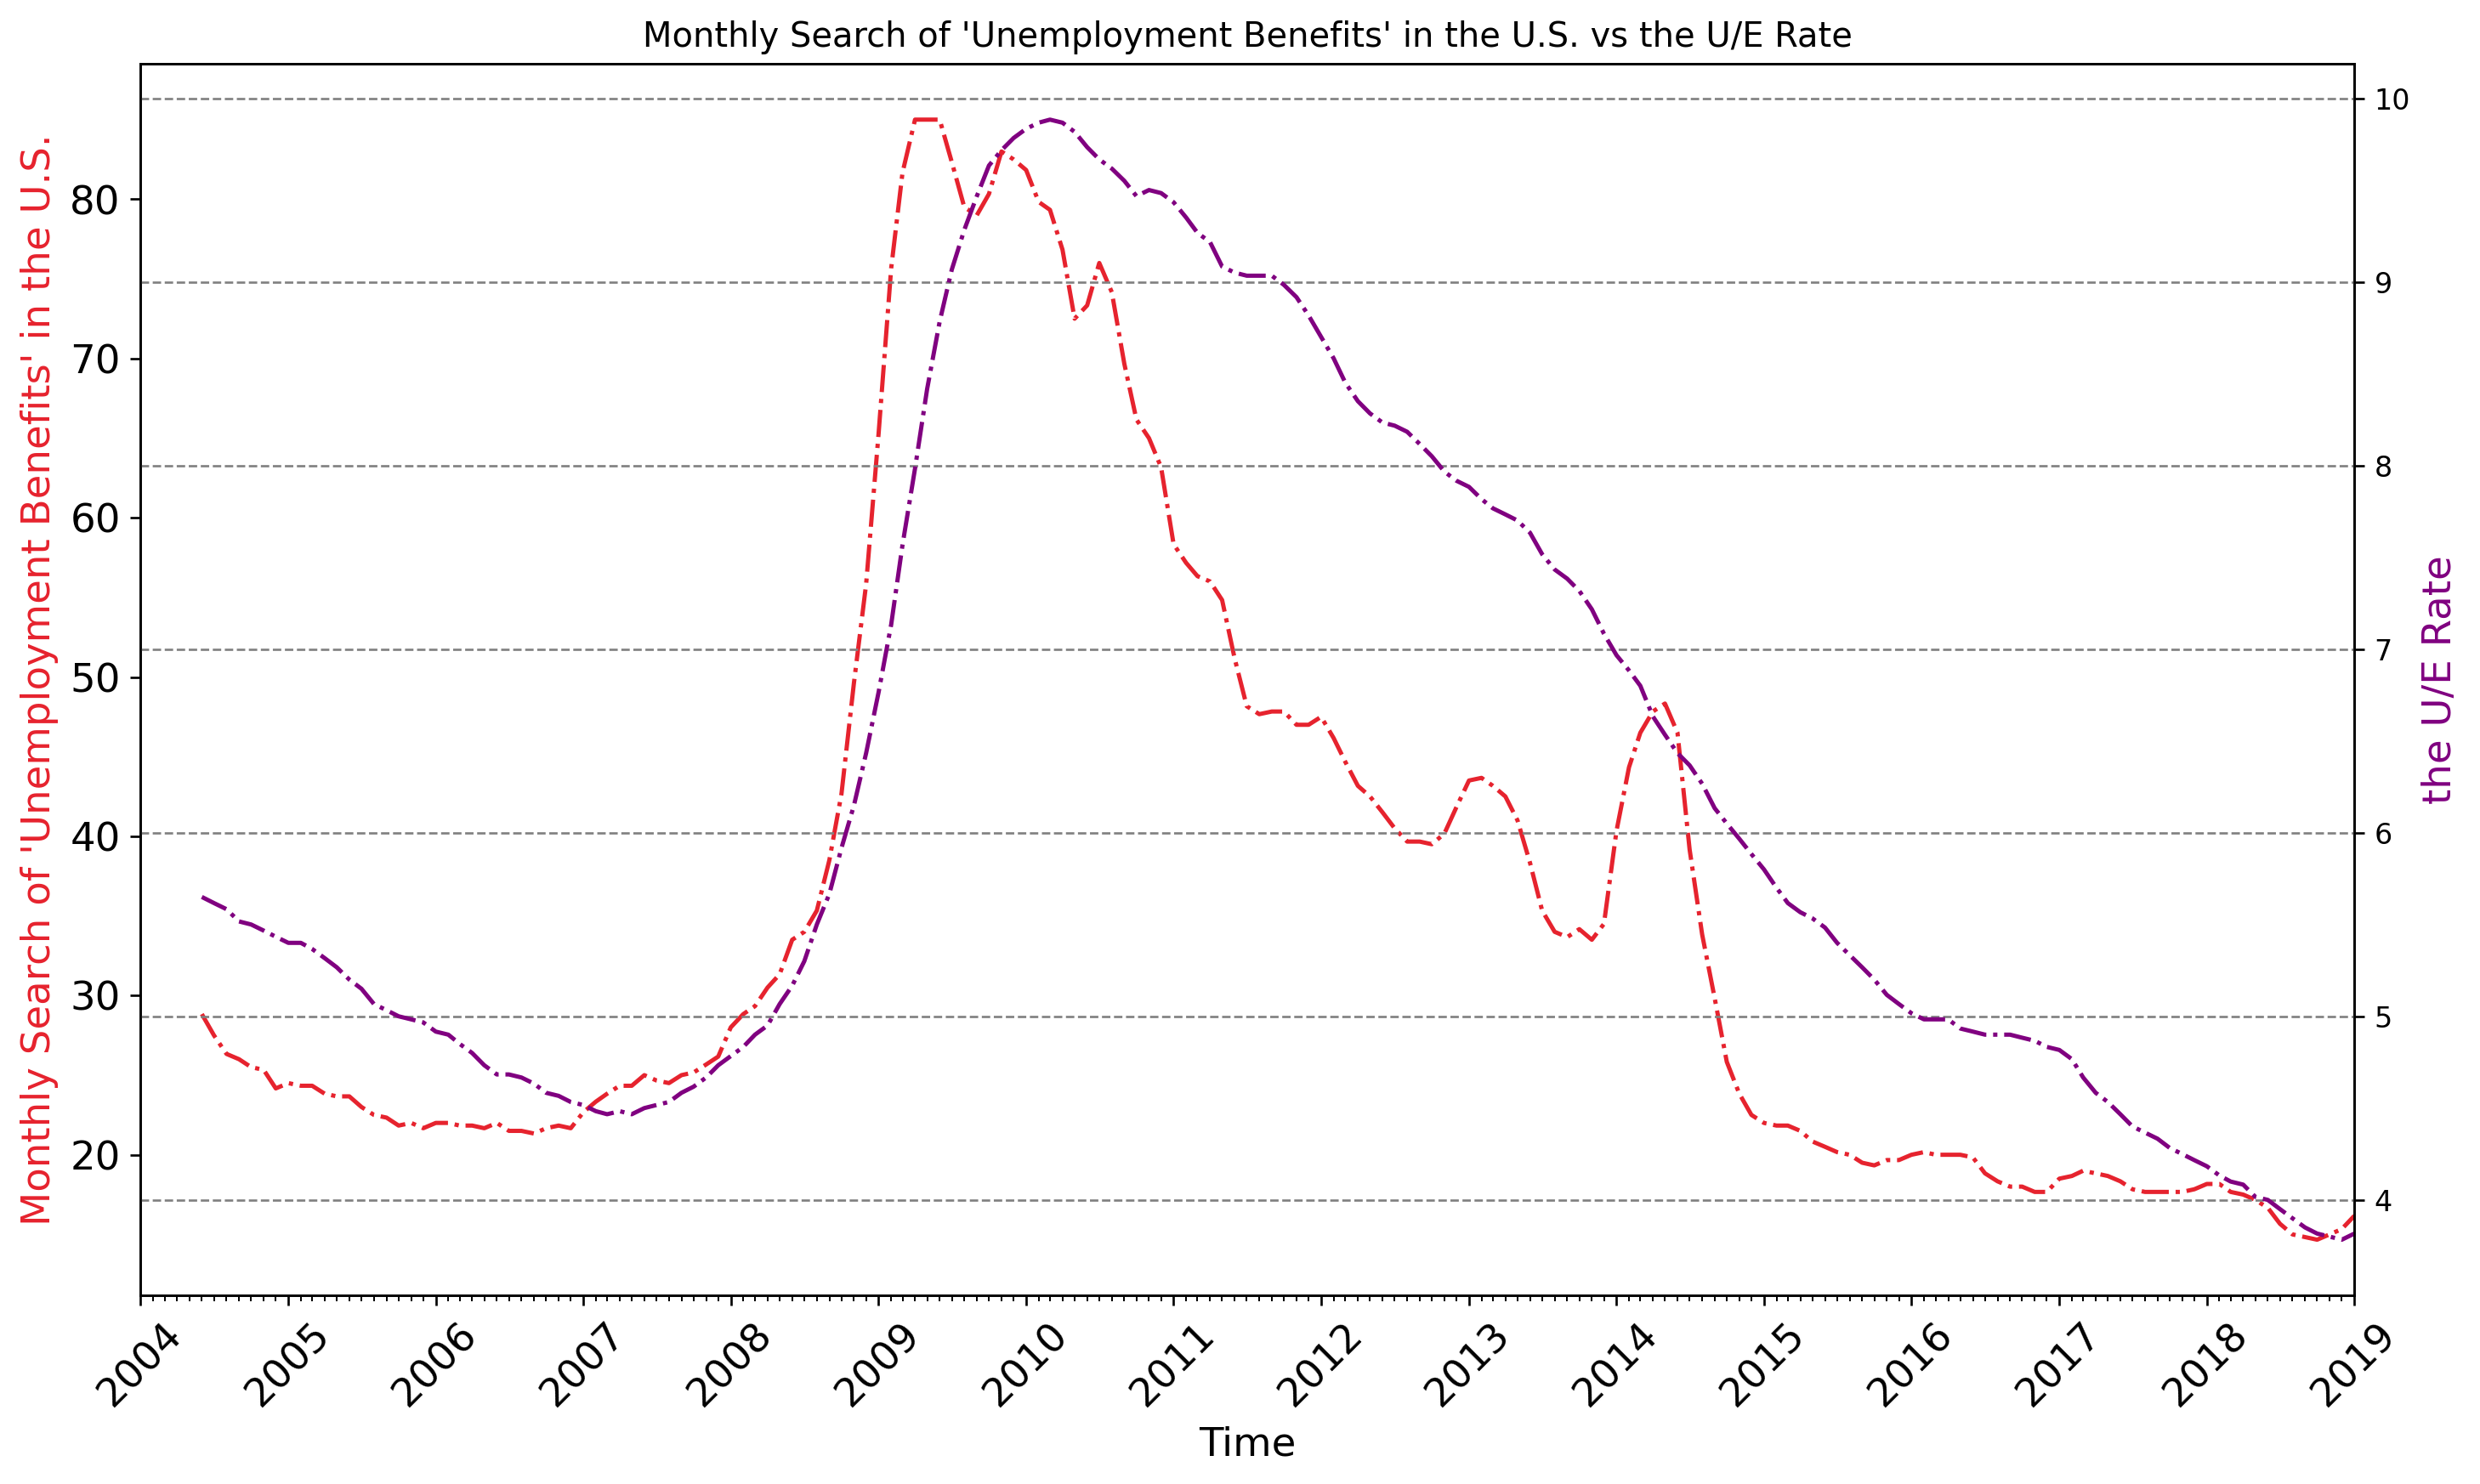

In [25]:
roll_df = df_unemployment[["UE_BENEFITS_WEB_SEARCH", "UNRATE"]].rolling(window=6).mean()

plt.figure(figsize=(14, 8), dpi=240)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate")

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_format = mdates.DateFormatter("%Y")

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color="#E6232E", linestyle="-.")
ax2.plot(df_unemployment.MONTH, roll_df.UNRATE, color="purple", linestyle="-.")

ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylabel("Monthly Search of 'Unemployment Benefits' in the U.S.", fontsize=14, color="#E6232E")
ax2.set_ylabel("the U/E Rate", fontsize=14, color="purple")

ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

plt.grid(color="grey", linestyle="dashed")

plt.show

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [27]:
df_ue_2020 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")
df_ue_2020


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6
...,...,...,...
195,2020-04,100,14.7
196,2020-05,63,13.3
197,2020-06,53,11.1
198,2020-07,54,10.2


In [28]:
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)
df_ue_2020

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6
...,...,...,...
195,2020-04-01,100,14.7
196,2020-05-01,63,13.3
197,2020-06-01,53,11.1
198,2020-07-01,54,10.2


<function matplotlib.pyplot.show>

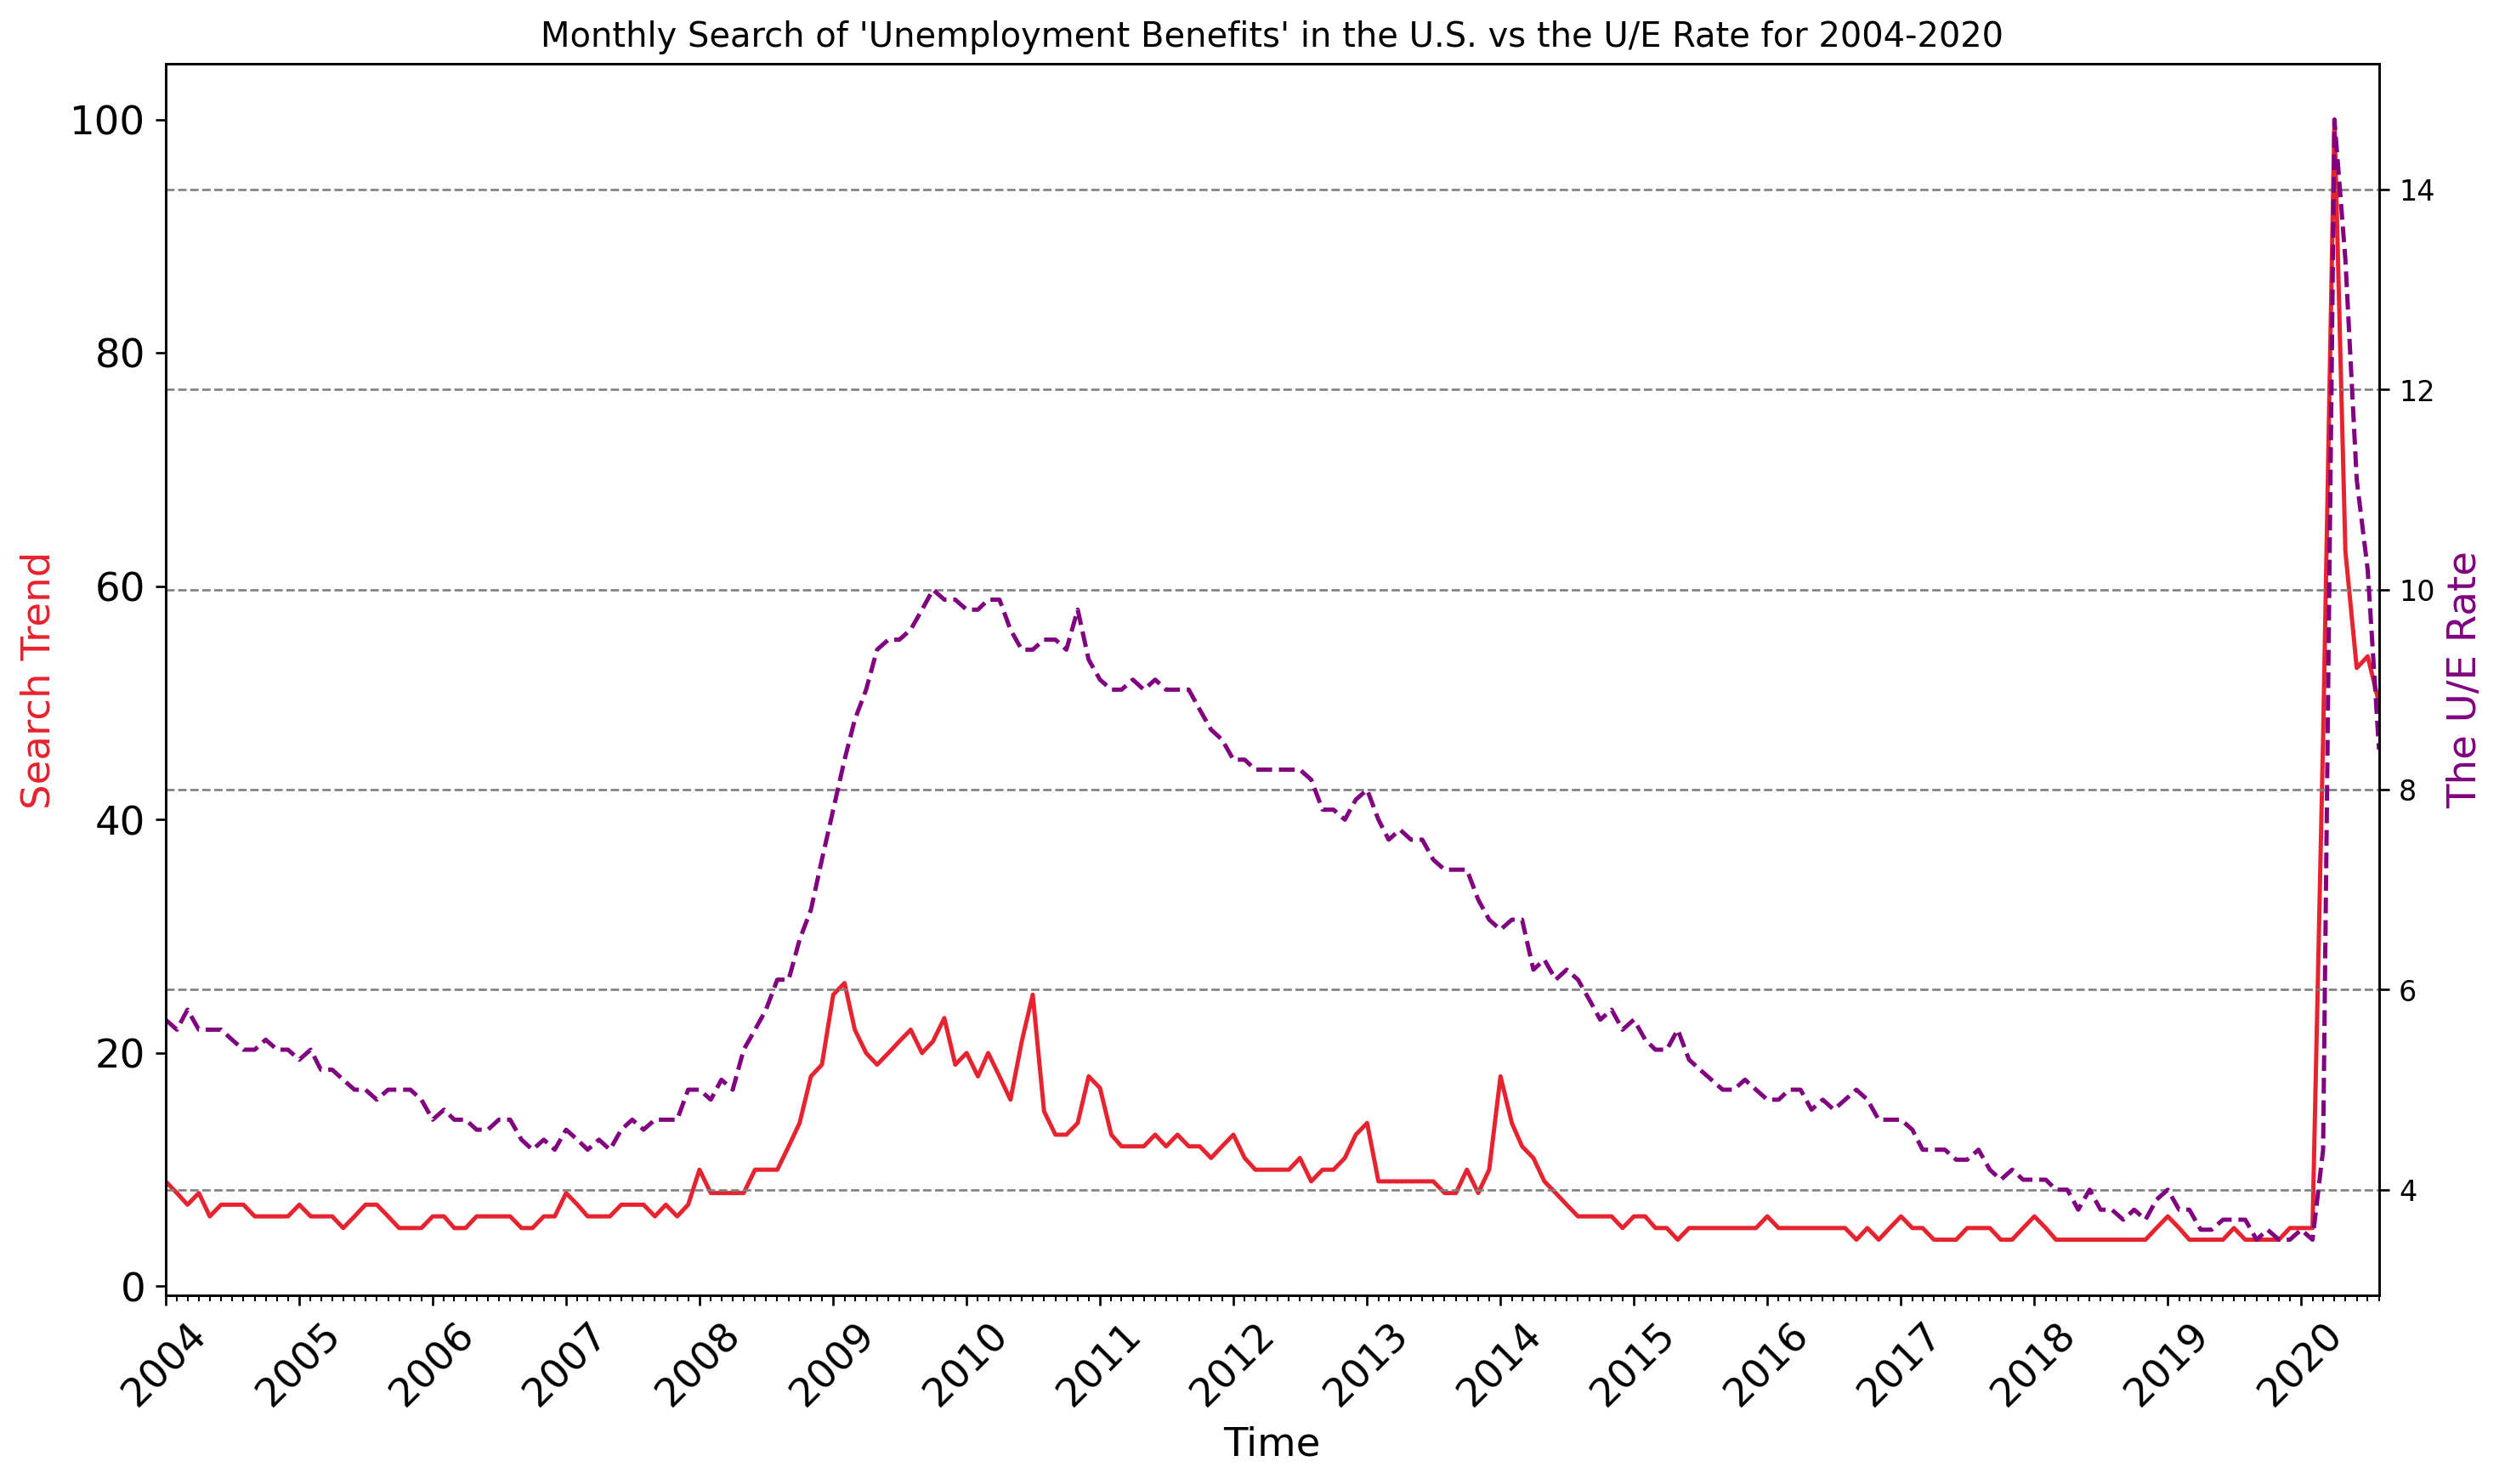

In [31]:
plt.figure(figsize=(14, 8), dpi=240)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate for 2004-2020")

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_format = mdates.DateFormatter("%Y")

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, color="#E6232E", linestyle="solid")
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, color="purple", linestyle="dashed")

ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylabel("Search Trend", fontsize=14, color="#E6232E")
ax2.set_ylabel("The U/E Rate", fontsize=14, color="purple")

ax1.set_xlim([df_ue_2020.MONTH[0], df_ue_2020.MONTH.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_format)
ax1.xaxis.set_minor_locator(months)

plt.grid(color="grey", linestyle="dashed")

plt.show